In [ ]:
pip install biopython 

In [25]:
from Bio.Seq import Seq

seq1 = Seq("CAGTCATACCT")
seq2 = Seq("CGTAT")

print(seq1+" "+seq2)

CAGTCATACCT CGTAT


In [26]:
# package pairwise2

# A. Alignments
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# 1. Global Alignment
g_align = pairwise2.align.globalxx(seq1, seq2)
print (g_align)

for align in g_align:
    print(format_alignment(*align))

[Alignment(seqA='CAGTCATACCT', seqB='C-G---TA--T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT---A--T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT-A----T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT-AT----', score=5.0, start=0, end=11)]
CAGTCATACCT
| |   ||  |
C-G---TA--T
  Score=5

CAGTCATACCT
| ||   |  |
C-GT---A--T
  Score=5

CAGTCATACCT
| || |    |
C-GT-A----T
  Score=5

CAGTCATACCT
| || ||    
C-GT-AT----
  Score=5



In [28]:
# 2. Local Alignment
l_align = pairwise2.align.localxx(seq1, seq2)
print(l_align)

for align in l_align:
    print(format_alignment(*align))

[Alignment(seqA='CAGTCATACCT', seqB='C-G---TA--T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT---A--T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT-A----T', score=5.0, start=0, end=11), Alignment(seqA='CAGTCATACCT', seqB='C-GT-AT----', score=5.0, start=0, end=7)]
CAGTCATACCT
| |   ||  |
C-G---TA--T
  Score=5

CAGTCATACCT
| ||   |  |
C-GT---A--T
  Score=5

CAGTCATACCT
| || |    |
C-GT-A----T
  Score=5

1 CAGTCAT
  | || ||
1 C-GT-AT
  Score=5



In [48]:
# B. Similarity (using alignment)

# Using Global Alignment
g_score = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True, score_only=True)
g_similarity = g_score / len(seq1) * 100
print("Using Global Similarity =", g_similarity)

# Using local alignment
l_score = pairwise2.align.localxx(seq1, seq2, one_alignment_only=True, score_only=True)
l_similarity = l_score / len(seq1) * 100
print("Using Local Similarity =", l_similarity)

Using Global Similarity = 45.45454545454545
Using Local Similarity = 45.45454545454545


In [71]:
# Example Case :
# Fidn out all the possible global alignments
# with the maximum similarity score
# Matching characters:2 points
# Each mismatching character :-1 point
# 0.5 points are deducted when opening a gap
# 0.1 points are deducted when extending it

seqX = Seq("CAGTCATACCT")
seqY = Seq("CAGATAAGCTG")

alignment = pairwise2.align.globalms(seqX, seqY, 2, -1, -0.5, -0.1)
print(alignment)
for align in alignment:
    print(format_alignment(*align))

[Alignment(seqA='CAGTCATAC--CT-', seqB='CAG--ATA-AGCTG', score=13.8, start=0, end=14), Alignment(seqA='CAGTCATA--CCT-', seqB='CAG--ATAAGC-TG', score=13.8, start=0, end=14)]
CAGTCATAC--CT-
|||  |||   || 
CAG--ATA-AGCTG
  Score=13.8

CAGTCATA--CCT-
|||  |||  | | 
CAG--ATAAGC-TG
  Score=13.8



In [84]:
# C. Distance


# 1. Hamming Distance
def hammingDistance(seqX, seqY):
    data = [ (x, y) for x, y, in zip(seqX, seqY) if x != y]
    # print(data)
    return len(data)

In [85]:
print("Seq X = ", seqX)
print("Seq Y = ", seqY)
hammingDistance(seqX, seqY)

Seq X =  CAGTCATACCT
Seq Y =  CAGATAAGCTG


6

In [95]:
# 2. Levenshtein Distant

# !pip install python-Levenshtein

from Levenshtein import distance

print("Seq X = ", seqX)
print("Seq Y = ", seqY)
print(distance(seqX, seqY))

Seq X =  CAGTCATACCT
Seq Y =  CAGATAAGCTG
5


In [115]:
# # Dot Plot

# # !pip install numpy
# # !pip install matplotlib

import numpy
import matplotlib.pyplot as plt

def check(x, y):
    return 0 if x == y else 1 # cara cepat
    # if x == y:
    #     return 0
    # else:
    #     return 1

def makeMatrix(seq1, seq2):
    len_1 = len(seq1)
    len_2 = len(seq2)
    return [[check(seq1[i], seq2[j]) for j in range(len_2)] for i in range(len_1)]


[[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]]


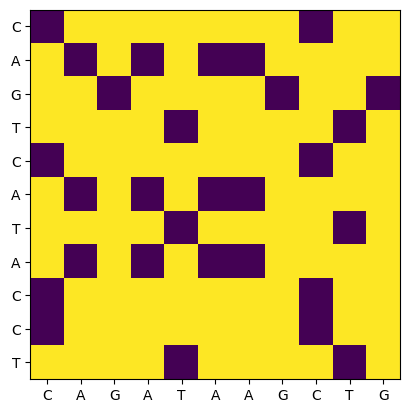

In [133]:
# GUI (Lebih mirip visualisasi)

res = makeMatrix(seqX, seqY)

dotplot = plt.imshow(numpy.array(res))
xAxis = plt.xticks(numpy.arange(len(list(seqY))), list(seqY))
yAxis = plt.yticks(numpy.arange(len(list(seqX))), list(seqX))

plt.show()

